In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#id name from Kaggle
id	a unique respondent identifier
year	the survey year
age	the respondent's age in years
race	the respondent's race, as character variable
sex	the respondent's gender, as character variable
hispaniccat	the respondent's Hispanic ethnicity, as character variable
educ	how many years the respondent spent in school
partyid	the respondent's party identification, as character variable
relactiv	the self-reported religious activity of the respondent on a 1:11 scale
abany	a binary variable that equals 1 if the respondent thinks abortion should be legal
for any reason. 0 indicates no support for abortion for any reason.

abdefect	a numeric vector that equals 1 if the respondent thinks abortion should be legal
if there is a serious defect in the fetus. 0 indicates no support for abortion in this circumstance.

abnomore	a numeric vector that equals 1 if the respondent thinks abortion should be legal if a woman
is pregnant but wants no more children. 0 indicates no support for abortion in this circumstance.

abhlth	a numeric vector that equals 1 if the respondent thinks abortion should be legal if a pregnant
woman's health is in danger. 0 indicates no support for abortion in this circumstance.

abpoor	a numeric vector that equals 1 if the respondent thinks abortion should be legal if a pregnant
woman is poor and cannot afford more children. 0 indicates no support for abortion in this circumstance.

abrape	a numeric vector that equals 1 if the respondent thinks abortion should be legal if the woman became
pregnant because of a rape. 0 indicates no support for abortion in this circumstance.

absingle	a numeric vector that equals 1 if the respondent thinks abortion should be legal if a pregnant woman
is single and does not want to marry the man who impregnated her. 0 indicates no support for abortion in this circumstance.

pid	partyid recoded so that 7 = NA
hispanic	a dummy variable that equals 1 if the respondent is any way Hispanic

In [4]:
ab_path = "C:\\Users\\User1\\Downloads\\abortion.csv\\gss_abortion.csv"  
ab_data = pd.read_csv(ab_path)
ab_data.tail()

,Unnamed: 0,id,year,age,race,sex,hispaniccat,educ,partyid,relactiv,abany,abdefect,abnomore,abhlth,abpoor,abrape,absingle,pid,hispanic
64809,64810,2344,2018,37.0,White,Female,3.0,12.0,Independent,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
64810,64811,2345,2018,75.0,White,Female,1.0,12.0,Not Str Republican,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0
64811,64812,2346,2018,67.0,White,Female,1.0,12.0,Independent,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0
64812,64813,2347,2018,72.0,White,Male,1.0,16.0,"Ind,Near Rep",3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0
64813,64814,2348,2018,79.0,White,Female,1.0,12.0,Independent,3.0,0.0,1.0,NaN,1.0,0.0,1.0,1.0,3.0,0.0


In [5]:
ab_data.drop('Unnamed: 0', axis=1, inplace=True)

# this fills the missing values in the age column with the median value
ab_data['age'].fillna(ab_data['age'].median(), inplace=True )

#this fills missing values in the educ column with the mode value
ab_data['educ'].fillna(ab_data['educ'].mode()[0], inplace=True )

#fills missing values in the partyid column with the mode value
ab_data['partyid'].fillna(ab_data['partyid'].mode()[0], inplace=True )
# fills missing values in the 'pid' column with the mode
ab_data['pid'].fillna(ab_data['pid'].mode()[0], inplace=True)

ab_data['relactiv'].fillna('Not applicable', inplace=True)
ab_data['hispaniccat'].fillna('Not Hispanic', inplace=True)
ab_data['hispanic'].fillna('Not Hispanic', inplace=True)

#Fills missing values in multiple columns with 0
ab_data[['abany', 'abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle']] = \
ab_data[['abany', 'abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle']].fillna(0)

In [6]:
ab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,64814.0,1151.810211,828.030233,1.0,507.0,1029.5,1570.0,4510.0
year,64814.0,1994.939180,13.465368,1972.0,1984.0,1996.0,2006.0,2018.0
age,64814.0,46.091971,17.504275,18.0,32.0,44.0,59.0,89.0
educ,64814.0,12.867313,3.172300,0.0,12.0,12.0,15.0,20.0
abany,64814.0,0.235042,0.424028,0.0,0.0,0.0,0.0,1.0
abdefect,64814.0,0.542722,0.498175,0.0,0.0,1.0,1.0,1.0
abnomore,64814.0,0.303360,0.459713,0.0,0.0,0.0,1.0,1.0
abhlth,64814.0,0.613278,0.487003,0.0,0.0,1.0,1.0,1.0
abpoor,64814.0,0.320764,0.466774,0.0,0.0,0.0,1.0,1.0
abrape,64814.0,0.551517,0.497343,0.0,0.0,1.0,1.0,1.0


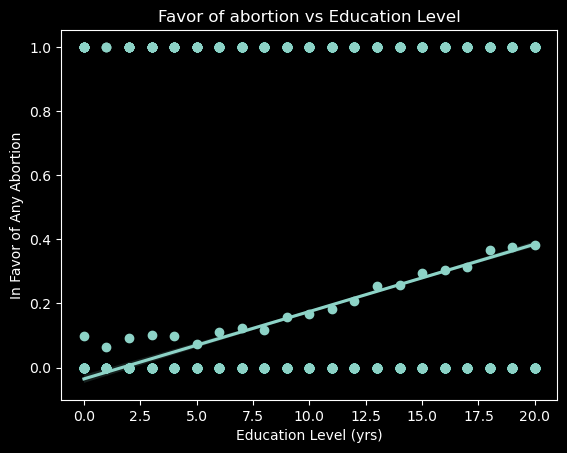

In [7]:
plt.style.use('dark_background')
educ_relationship = ab_data.groupby('educ')['abany'].mean()

plt.scatter(educ_relationship.index, educ_relationship.values)
sns.regplot(x='educ', y='abany', data=ab_data)

plt.xlabel('Education Level (yrs)')
plt.ylabel('In Favor of Any Abortion')
plt.title('Favor of abortion vs Education Level')

plt.show()

In [8]:
variance = ab_data['abany'].var()
variance
#this shows that linear regresion line a good fit and that there is little variance

0.1797999326785458

This scatter plot represents the relationship between education level and being in favor of abortion for any case. While a strong correlation does not imply causation it does show that there is a positive linear relationship

In [9]:
ab_data

,id,year,age,race,sex,hispaniccat,educ,partyid,relactiv,abany,abdefect,abnomore,abhlth,abpoor,abrape,absingle,pid,hispanic
0,1,1972,23.0,White,Female,Not Hispanic,16.0,"Ind,Near Dem",Not applicable,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Not Hispanic
1,2,1972,70.0,White,Male,Not Hispanic,10.0,Not Str Democrat,Not applicable,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,Not Hispanic
2,3,1972,48.0,White,Female,Not Hispanic,12.0,Independent,Not applicable,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,Not Hispanic
3,4,1972,27.0,White,Female,Not Hispanic,17.0,Not Str Democrat,Not applicable,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,Not Hispanic
4,5,1972,61.0,White,Female,Not Hispanic,12.0,Strong Democrat,Not applicable,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Not Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64809,2344,2018,37.0,White,Female,3.0,12.0,Independent,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
64810,2345,2018,75.0,White,Female,1.0,12.0,Not Str Republican,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0
64811,2346,2018,67.0,White,Female,1.0,12.0,Independent,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0
64812,2347,2018,72.0,White,Male,1.0,16.0,"Ind,Near Rep",3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
